# Études statistiques

In [1]:
# -*- coding: utf-8 -*-
# Jianying LIU

In [2]:
import glob
from tools_mwe import restructurer_cupt,get_one_type_mwe_list
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
import numpy as np

## Nombre des MWE annotées/détectées

In [3]:
path_par_data = "../2_traitements/"
corpus_ancor_er = ["ANCOR/ESLO_ANCOR","ANCOR/ESLO_CO2","ANCOR/OTG","ANCOR/UBS","ER2003/ER2003_len300_1-100"]
corpus_ancor = ["ANCOR/ESLO_ANCOR","ANCOR/ESLO_CO2","ANCOR/OTG","ANCOR/UBS"]
corpus_er = ["ER2003/ER2003_len300_1-100"]
corpus_sequoia = ["SEQUOIA/annodisER","SEQUOIA/emea","SEQUOIA/frwiki"]

# Utiliser ensemble
liste_subcorpus = []
liste_nbre = []
MWE_type = ["VID", "LVC.full", "LVC.cause", "IRV", "MVC", "all"]

### Sequoia

In [4]:
liste_sent_sequoia = []
for subcorpus in corpus_sequoia:
    fic = path_par_data + subcorpus + "/*.cupt"
    
    print(f"{subcorpus} : {len(glob.glob(fic))} fichiers")
    nbre_subcorpus = 0
    for fichier in glob.glob(fic):
        liste_file = restructurer_cupt(fichier)
        liste_sent_sequoia.extend(liste_file)
        nbre_subcorpus += len(liste_file)
    liste_subcorpus.append(subcorpus)
    liste_nbre.append(nbre_subcorpus)
    print("Nombre de phrases contenant MWE:", nbre_subcorpus)
print("Nombre total de phrases contenant MWE :", len(liste_sent_sequoia))

SEQUOIA/annodisER : 36 fichiers
Nombre de phrases contenant MWE: 162
SEQUOIA/emea : 2 fichiers
Nombre de phrases contenant MWE: 205
SEQUOIA/frwiki : 19 fichiers
Nombre de phrases contenant MWE: 197
Nombre total de phrases contenant MWE : 564


In [6]:
liste_mwe_nbre_sequoia = []
for type_mwe in MWE_type :
    _, nbre_mwe = get_one_type_mwe_list(liste_sent_sequoia, type_mwe)
    liste_mwe_nbre_sequoia.append(nbre_mwe)
print("#### Nombre des MWE ####")
for i in range(len(MWE_type)):
    print(f"{MWE_type[i]} : {liste_mwe_nbre_sequoia[i]}")

#### Nombre des MWE ####
VID : 204
LVC.full : 340
LVC.cause : 9
IRV : 132
MVC : 3
all : 688


### Ancor

In [7]:
liste_sent_ancor = []
for subcorpus in corpus_ancor:
    fic = path_par_data + subcorpus + "/*.cupt"
    
    print(f"{subcorpus} : {len(glob.glob(fic))} fichiers")
    nbre_subcorpus = 0
    for fichier in glob.glob(fic):
        liste_file = restructurer_cupt(fichier)
        liste_sent_ancor.extend(liste_file)
        nbre_subcorpus += len(liste_file)
    liste_subcorpus.append(subcorpus)
    liste_nbre.append(nbre_subcorpus)
    print("Nombre de phrases contenant MWE:", nbre_subcorpus)
print("Nombre total de phrases contenant MWE :", len(liste_sent_ancor))

ANCOR/ESLO_ANCOR : 99 fichiers
Nombre de phrases contenant MWE: 4250
ANCOR/ESLO_CO2 : 3 fichiers
Nombre de phrases contenant MWE: 399
ANCOR/OTG : 313 fichiers
Nombre de phrases contenant MWE: 353
ANCOR/UBS : 40 fichiers
Nombre de phrases contenant MWE: 54
Nombre total de phrases contenant MWE : 5056


In [8]:
liste_mwe_nbre_ancor = []
for type_mwe in MWE_type :
    _, nbre_mwe = get_one_type_mwe_list(liste_sent_ancor, type_mwe)
    liste_mwe_nbre_ancor.append(nbre_mwe)
    
print("#### Nombre des MWE ####")
for i in range(len(MWE_type)):
    print(f"{MWE_type[i]} : {liste_mwe_nbre_ancor[i]}")

#### Nombre des MWE ####
VID : 4760
LVC.full : 1264
LVC.cause : 6
IRV : 690
MVC : 36
all : 6756


### ER

In [9]:
liste_sent_ER = []
for subcorpus in corpus_er:
    fic = path_par_data + subcorpus + "/*.cupt"
    
    print(f"{subcorpus} : {len(glob.glob(fic))} fichiers")
    nbre_subcorpus = 0
    for fichier in glob.glob(fic):
        liste_file = restructurer_cupt(fichier)
        liste_sent_ER.extend(liste_file)
        nbre_subcorpus += len(liste_file)
    liste_subcorpus.append(subcorpus)
    liste_nbre.append(nbre_subcorpus)
    print("Nombre de phrases contenant MWE:", nbre_subcorpus)
print("Nombre total de phrases contenant MWE :", len(liste_sent_ER))

ER2003/ER2003_len300_1-100 : 100 fichiers
Nombre de phrases contenant MWE: 530
Nombre total de phrases contenant MWE : 530


In [10]:
liste_mwe_nbre_ER = []
for type_mwe in MWE_type :
    _, nbre_mwe = get_one_type_mwe_list(liste_sent_ER, type_mwe)
    liste_mwe_nbre_ER.append(nbre_mwe)

print("#### Nombre des MWE ####")
for i in range(len(MWE_type)):
    print(f"{MWE_type[i]} : {liste_mwe_nbre_ER[i]}")

#### Nombre des MWE ####
VID : 302
LVC.full : 122
LVC.cause : 3
IRV : 174
MVC : 2
all : 603


### Nombre de phrases contenant MWE dans chaque sous-corpus

In [11]:
print("#### Nombre de phrases contenant MWE ####")
for i in range(len(liste_subcorpus)):
    print(f"{liste_subcorpus[i]} : {liste_nbre[i]}")

#### Nombre de phrases contenant MWE ####
SEQUOIA/annodisER : 162
SEQUOIA/emea : 205
SEQUOIA/frwiki : 197
ANCOR/ESLO_ANCOR : 4250
ANCOR/ESLO_CO2 : 399
ANCOR/OTG : 353
ANCOR/UBS : 54
ER2003/ER2003_len300_1-100 : 530


## Croisements

**Fichier json**

In [12]:
def json2df(corpus):
    df_resultats = pd.DataFrame()
    for fichier in glob.glob(f"{corpus}*_validation.json"):
        subcorpus = re.sub("_[0-9]+_validation.json", "", fichier)
        with open(fichier, 'r', encoding="utf8") as json_file:
            data = json.load(json_file)
            for type_mwe in data:
                dftmp = pd.DataFrame(data[type_mwe]['MWES'])
                dftmp["TYPE"] = type_mwe
                dftmp["CORPUS"] = subcorpus
                df_resultats = pd.concat([df_resultats, dftmp], ignore_index = True)
    return df_resultats

In [13]:
def test_error(x):
    MWE_error = ["MWE incorrecte", "MWE littérale", "MWE type incorrect"]
    for error in x:
        if error in MWE_error:
            return True
    return False

# col error_mwe : si c'est l'erreur de MWE : True, else: False

In [14]:
# traiter les types incorrectes (souvent VID), pour les transférer dans LVC.full après
def type_reel(x):
    type_error = "MWE type incorrect"
    if type_error in x:
        return "LVC.full"
#     else:
#         return None

### Ancor

In [15]:
df_ancor = json2df("ancor")
mask = df_ancor["SOURCE D'ERREUR"].apply(test_error)
df_ancor["error_mwe"]=mask
mask2 = df_ancor["SOURCE D'ERREUR"].apply(type_reel)
df_ancor["real_type"]=mask2
df_ancor["real_type"].fillna(df_ancor["TYPE"], inplace=True)
df_ancor.head(3)

,FICHIER,PHRASE,TOKENS,COREF,CAS,CHAINE(S),VALIDATION,DEGRE DE COMPOSITIONNALITE,SOURCE D'ERREUR,LEMMES,TYPE,CORPUS,error_mwe,real_type
0,023_C_mwe_coref.cupt,bah parce que celui qui reçoit une lettre qui ...,"['donne', 'impression']","['*', '273:2434']",{'2434': 4},"{'273': '{'2434': ['mauvaise', 'impression'], ...",vrai,moyen,[],"[donner, impression]",LVC.cause,ancor_ESLO_ANCOR,False,LVC.cause
1,009_C-2_mwe_coref.cupt,lorsque la voiture moi je voudrais être plusie...,"['faire', 'ça']","['*', '19:187']",{'187': 3},"{'19': '{'182': ['de', 'le', 'trajet'], '187':...",faux,,[MWE incorrecte],"[faire, ça]",VID,ancor_ESLO_ANCOR,True,VID
2,009_C-2_mwe_coref.cupt,ah c'est-à-dire que dans ce point de vue -là y...,"['faire', 'ça']","['*', '48:406']",{'406': 3},"{'48': '{'399': ['de', 'les', 'choses'], '400'...",faux,,[MWE incorrecte],"[faire, ça]",VID,ancor_ESLO_ANCOR,True,VID


In [16]:
# tous les MWE faux qui sont annoté vrai pour croisement
test = df_ancor[(df_ancor["error_mwe"]==True) & (df_ancor["VALIDATION"]=="vrai")]
test

,FICHIER,PHRASE,TOKENS,COREF,CAS,CHAINE(S),VALIDATION,DEGRE DE COMPOSITIONNALITE,SOURCE D'ERREUR,LEMMES,TYPE,CORPUS,error_mwe,real_type
24,133_C-3_mwe_coref.cupt,ou pour faire rire peut-être je vais vous pose...,"['vous', 'poser', 'question']","['*', '*', '0:3']",{'3': 4},"{'0': '{'3': ['une', 'question'], '7': ['y']}'}",vrai,moyen,"[MWE incorrecte, MWE type incorrect]","[lui, poser, question]",VID,ancor_ESLO_ANCOR,True,LVC.full
66,010_C-5_mwe_coref.cupt,jamais oh ben c' est parce que nous n' avons p...,"['est', 'nous', 'temps']","['*', '*', '77:749']",{'749': 4},"{'77': '{'749': ['le', 'temps'], '750': ['le',...",vrai,moyen,[MWE incorrecte],"[être, il, temps]",VID,ancor_ESLO_ANCOR,True,VID
69,010_C-5_mwe_coref.cupt,j' aimerais vous poser une dernière question m...,"['vous', 'poser', 'question']","['*', '*', '108:960']",{'960': 4},"{'108': '{'960': ['une', 'dernière', 'question...",vrai,moyen,"[MWE incorrecte, MWE type incorrect]","[lui, poser, question]",VID,ancor_ESLO_ANCOR,True,LVC.full
79,008_C-2_mwe_coref.cupt,je vous pose la question,"['vous', 'pose', 'question']","['*', '*', '49:358']",{'358': 4},"{'49': '{'346': ['cette', 'question'], '350': ...",vrai,moyen,"[MWE incorrecte, MWE type incorrect]","[lui, poser, question]",VID,ancor_ESLO_ANCOR,True,LVC.full
146,026_C-2_mwe_coref.cupt,et nous avons dit bon quand je vous ai posé la...,"['vous', 'posé', 'question']","['*', '*', '70:473']",{'473': 4},"{'70': '{'473': ['la', 'question'], '494': ['l...",vrai,moyen,"[MWE incorrecte, MWE type incorrect]","[lui, poser, question]",VID,ancor_ESLO_ANCOR,True,LVC.full
147,026_C-2_mwe_coref.cupt,enfin je vous euh j' ai posé la question est -...,"['vous', 'posé', 'question']","['*', '*', '70:494']",{'494': 4},"{'70': '{'473': ['la', 'question'], '494': ['l...",vrai,moyen,"[MWE incorrecte, MWE type incorrect]","[lui, poser, question]",VID,ancor_ESLO_ANCOR,True,LVC.full
205,132_C-1_mwe_coref.cupt,alors tout ça alors je me dis toujours euh vou...,"['le', 'temps', 'prends']","['57:474', '57:474', '*']",{'474': 4},"{'57': '{'187': ['le', 'temps'], '474': ['de',...",vrai,moyen,[MWE incorrecte],"[le, temps, prendre]",VID,ancor_ESLO_ANCOR,True,VID
225,021_C-5_mwe_coref.cupt,madame alors j' ai encore quelques questions s...,"['vous', 'poser', 'question']","['*', '*', '0:10']",{'10': 4},"{'0': '{'10': ['une', 'question'], '11': ['qui...",vrai,moyen,"[MWE incorrecte, MWE type incorrect]","[lui, poser, question]",VID,ancor_ESLO_ANCOR,True,LVC.full
245,019_C-2_mwe_coref.cupt,bon alors al- avant de passer à autre chose je...,"['vous', 'poser', 'question']","['*', '*', '43:339']",{'339': 4},"{'43': '{'339': ['une', 'question'], '340': ['...",vrai,moyen,"[MWE incorrecte, MWE type incorrect]","[lui, poser, question]",VID,ancor_ESLO_ANCOR,True,LVC.full
754,133_C-2_mwe_coref.cupt,euh oui oui d' accord oui ça euh d' accord mai...,"['influence', 'a']","['135:786', '*']",{'786': 3},"{'135': '{'786': ['influence'], '787': ['en'],...",vrai,moyen,[MWE incorrecte],"[influence, avoir]",LVC.full,ancor_ESLO_ANCOR,True,LVC.full


In [19]:
print("nombre total de croisement dans ancor:", len(df_ancor))
df_ancor.VALIDATION.value_counts()

nombre total de croisement dans ancor: 1037


faux           681
vrai           249
répétitions    107
Name: VALIDATION, dtype: int64

### Sequoia

In [17]:
df_sequoia = json2df("sequoia")
mask = df_sequoia["SOURCE D'ERREUR"].apply(test_error)
df_sequoia["error_mwe"]=mask
df_sequoia["real_type"] = df_sequoia["TYPE"]
df_sequoia.head(3)

,TYPE,CORPUS,FICHIER,PHRASE,TOKENS,COREF,CAS,CHAINE(S),VALIDATION,DEGRE DE COMPOSITIONNALITE,SOURCE D'ERREUR,LEMMES,error_mwe,real_type
0,VID,sequoia_annodisER,annodisER_34_mwe_coref.cupt,"Bien sûr, je ne néglige pas l'aspect financier...","['pris', 'en', 'compte']","['*', '*', '0:90']",{'90': 3},"{'0': '{'80': ['M.', 'Rousselot'], '81': ['me'...",faux,,[chaîne incorrecte],"[prendre, en, compte]",False,VID
1,VID,sequoia_annodisER,annodisER_10_mwe_coref.cupt,S'apercevant que son mari avait soudainement p...,"['perdu', 'connaissance']","['*', '0:11']",{'11': 3},"{'0': '{'11': ['connaissance'], '13': ['passag...",faux,,[chaîne incorrecte],"[perdre, connaissance]",False,VID
2,VID,sequoia_annodisER,annodisER_12_mwe_coref.cupt,"à travers cette balade interplanétaire, le vis...","['répondait', 'à', 'le', 'nom']","['*', '8:59', '8:59', '8:59']",{'59': 4},"{'8': '{'59': ['à', 'le', 'nom', 'de', 'Messie...",faux,,[chaîne incorrecte],"[répondre, à, le, nom]",False,VID


In [20]:
print("nombre total de croisement dans Sequoia:", len(df_sequoia))
df_sequoia.VALIDATION.value_counts()

nombre total de croisement dans Sequoia: 178


faux            143
vrai             24
non concerné      9
discutable        2
Name: VALIDATION, dtype: int64

### ER

In [18]:
df_er = json2df("ER")
mask = df_er["SOURCE D'ERREUR"].apply(test_error)
df_er["error_mwe"]=mask
df_er["real_type"] = df_er["TYPE"]
df_er.head(50)

,FICHIER,PHRASE,TOKENS,COREF,CAS,CHAINE(S),VALIDATION,DEGRE DE COMPOSITIONNALITE,SOURCE D'ERREUR,LEMMES,TYPE,CORPUS,error_mwe,real_type
0,2003-01-02_769_mwe_coref.cupt,"Pas d'arrogance, simplement l'envie de se donn...","['envie', 'donner']","['1:7', '*']",{'7': 4},"{'1': '{'1': ['«', ""S'"", 'étalonner'], '3': ['...",faux,,"[chaîne incorrecte, MWE incorrecte]","[envie, donner]",LVC.cause,ER_0-100,True,LVC.cause
1,2003-01-02_436_mwe_coref.cupt,"Mais rappelons-nous aussi, au seuil de ce nouv...","['rappelons', '-nous']","['*', '27:240']",{'240': 3},"{'27': '{'233': ['les', 'gens'], '240': ['-nou...",faux,,[chaîne incorrecte],"[rappeler, nous]",IRV,ER_0-100,False,IRV
2,2003-01-02_769_mwe_coref.cupt,Le trophée des petits Lions de l'ASM Belfort a...,"['connu', 'succès']","['*', '50:219']",{'219': 4},"{'50': '{'219': ['un', 'beau', 'succès', 'popu...",faux,,[chaîne incorrecte],"[connaître, succès]",LVC.full,ER_0-100,False,LVC.full
3,2003-01-02_769_mwe_coref.cupt,Mais il est tout aussi clair que la joueuse ne...,"['prendra', 'décision']","['*', '31:444']",{'444': 4},"{'31': '{'429': ['actualité'], '437': ['elle']...",faux,,[chaîne incorrecte],"[prendre, décision]",LVC.full,ER_0-100,False,LVC.full
4,2003-01-02_509_mwe_coref.cupt,C'est l'expérience désagréable vécue par une f...,"['expérience', 'vécue']","['15:69', '*']",{'69': 4},"{'15': '{'66': [""l'"", 'animal'], '69': [""l'"", ...",faux,,[chaîne incorrecte],"[expérience, vivre]",LVC.full,ER_0-100,False,LVC.full
5,2003-01-02_657_mwe_coref.cupt,"On y retrouve ses voisins, on bavarde, « parfo...","['ai', 'droit']","['*', '5:51']",{'51': 3},"{'5': '{'37': ['On'], '42': ['Henri', ','], '4...",faux,,[chaîne incorrecte],"[avoir, droit]",LVC.full,ER_0-100,False,LVC.full
6,2003-01-02_657_mwe_coref.cupt,"Un grand coup de klaxon, et le tour est joué.","['tour', 'joué']","['3:115', '*']",{'115': 4},"{'3': '{'108': ['réveillon'], '111': ['Neufchâ...",faux,,[chaîne incorrecte],"[tour, jouer]",LVC.full,ER_0-100,False,LVC.full
7,2003-01-02_612_mwe_coref.cupt,Dommage que le signal de minuit n'ait pas été ...,"['faire', 'fête']","['*', '15:34']",{'34': 4},"{'15': '{'29': ['la', 'foule'], '34': ['la', '...",faux,,[chaîne incorrecte],"[faire, fête]",LVC.full,ER_0-100,False,LVC.full
8,2003-01-02_186_mwe_coref.cupt,Sa grande passion fut son travail qu'il effect...,"['travail', 'effectua']","['0:165', '*']",{'165': 4},"{'0': '{'88': ['il'], '89': ['agent', 'commerc...",faux,,[chaîne incorrecte],"[travail, effectuer]",LVC.full,ER_0-100,False,LVC.full
9,2003-01-02_399_mwe_coref.cupt,"Fin juin, quand j'ai donné mon accord au prési...","['donné', 'accord']","['*', '6:23;3:24']","{'24': 4, '23': 4}","{'6': '{'23': ['mon', 'accord'], '28': ['je'],...",faux,,[chaîne incorrecte],"[donner, accord]",LVC.full,ER_0-100,False,LVC.full


In [21]:
print("nombre total de croisement dans ER:", len(df_er))
df_er.VALIDATION.value_counts()

nombre total de croisement dans ER: 96


faux          91
vrai           3
discutable     2
Name: VALIDATION, dtype: int64

## Nombre de EPV détectées, de croisements détectés et de croisements validés

In [22]:
# xticks
cat_MWE = ["VID", "LVC.full", "LVC.cause", "IRV", "MVC"]

In [23]:
def gat_mwe_crois_nbre(cat_MWE, df_cat):
    #nombre croisement détecté
    nbre_crois = []
    for cat in cat_MWE:
        nbre_cat = len(df_cat[(df_cat.TYPE == cat) & (df_cat.error_mwe==False)])
        nbre_crois.append(nbre_cat)

    # nombre vrai croisement
    nbre_vrai_crois = []
    df_cat_vrai = df_cat[df_cat.VALIDATION == "vrai"]
    for cat in cat_MWE:
        nbre_cat = len(df_cat_vrai[df_cat_vrai.real_type == cat])
        nbre_vrai_crois.append(nbre_cat)
    return nbre_crois, nbre_vrai_crois

In [24]:
def draw_stackedbar_EPVcrois_cat(cat_MWE, nbre_mwe, nbre_crois, nbre_vrai_crois):
    x = np.arange(5)+1
    plt.figure(figsize=(15,8))
    
    
    # draw the bar

    # bar for MWE
    plt.bar(x,nbre_mwe,width=0.35,align="center",color="lightgrey", alpha=0.8)   
    for a,b in zip(x,nbre_mwe):  
        plt.text(a, b+5, f"EPV:{int(b)}", ha='center', va='bottom', fontsize=12)

    # bar for croisement
    plt.bar(x,nbre_crois,width=0.35,align="center",color="gray", alpha=0.8)
    for a,b in zip(x,nbre_crois):
        plt.text(a-0.2, b+0.05, str(int(b)), ha='left', va='bottom', fontsize=12)

    # bar for vrai croisement
    plt.bar(x,nbre_vrai_crois,width=0.35,align="center",color="black", alpha=0.8)
    for a,b in zip(x,nbre_vrai_crois):
        plt.text(a+0.35, b+0.05, f"vrai:{int(b)}", ha='right', va='bottom', fontsize=12)

    # add legend
    plt.legend(["EPV détectés sans croisements","faux croisements détectés","croisements validés"], loc=1, fontsize=15)

    # add the cat labels
    plt.xticks(x,cat_MWE,size=18)

    # add x,y label
    plt.xlabel("Catégories des EP", fontsize=20)
    plt.ylabel("Nombre", fontsize=20)
    # plt.title("Comparaisons des nombres de EP détectés, croisements détectés et vrai croisements")
    plt.show()

In [25]:
# liste des nombres de sequoia, er, ancor
nbre_mwe_sequoia = liste_mwe_nbre_sequoia[:5]
nbre_mwe_er = liste_mwe_nbre_ER[:5]
nbre_mwe_ancor = liste_mwe_nbre_ancor[:5]
corpus_dico = {"sequoia":(liste_mwe_nbre_sequoia[:5],df_sequoia),
               "er":(liste_mwe_nbre_ER[:5],df_er),
               "ancor":(liste_mwe_nbre_ancor[:5],df_ancor)}

mwe_nbre = np.zeros(shape=(len(corpus_dico),len(cat_MWE)))
crois_nbre = np.zeros(shape=(len(corpus_dico),len(cat_MWE)))
vrai_nbre = np.zeros(shape=(len(corpus_dico),len(cat_MWE)))
i = 0
corpus_inorder = []
for corpus,info in corpus_dico.items():
    corpus_inorder.append(corpus)
    mwe_nbre[i] = info[0]
    crois_nbre[i], vrai_nbre[i] = gat_mwe_crois_nbre(cat_MWE,info[1])
    i += 1
    
print(f"Les corpus par ligne (dans l'ordre : {corpus_inorder})")
print("#### Nombre des MWE ####")
print(mwe_nbre)
print("#### Nombre des croisements détectés ####")
print(crois_nbre)
print("#### Nombre des croisements vrais ####")
print(vrai_nbre)

Les corpus par ligne (dans l'ordre : ['sequoia', 'er', 'ancor'])
#### Nombre des MWE ####
[[2.040e+02 3.400e+02 9.000e+00 1.320e+02 3.000e+00]
 [3.020e+02 1.220e+02 3.000e+00 1.740e+02 2.000e+00]
 [4.760e+03 1.264e+03 6.000e+00 6.900e+02 3.600e+01]]
#### Nombre des croisements détectés ####
[[ 34. 141.   2.   1.   0.]
 [ 31.  44.   0.   1.   0.]
 [ 52. 292.   1.   0.   0.]]
#### Nombre des croisements vrais ####
[[  1.  22.   0.   1.   0.]
 [  0.   3.   0.   0.   0.]
 [ 28. 220.   1.   0.   0.]]


sequoia


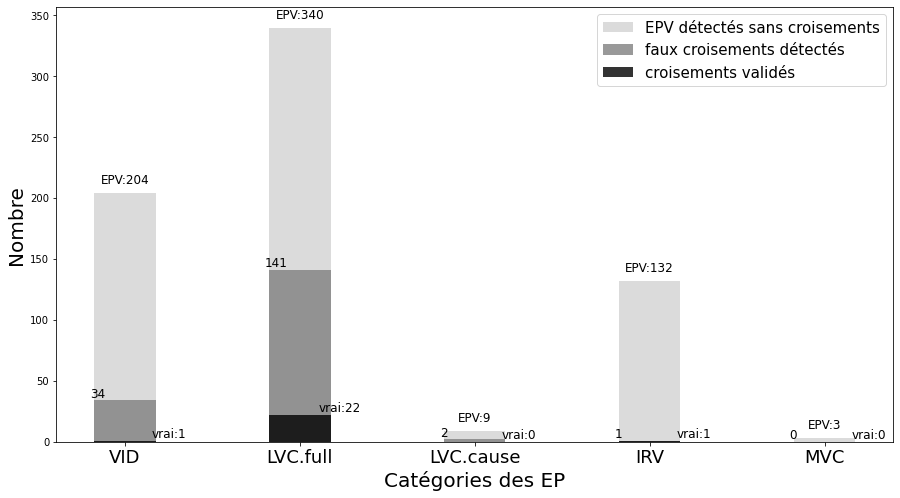

er


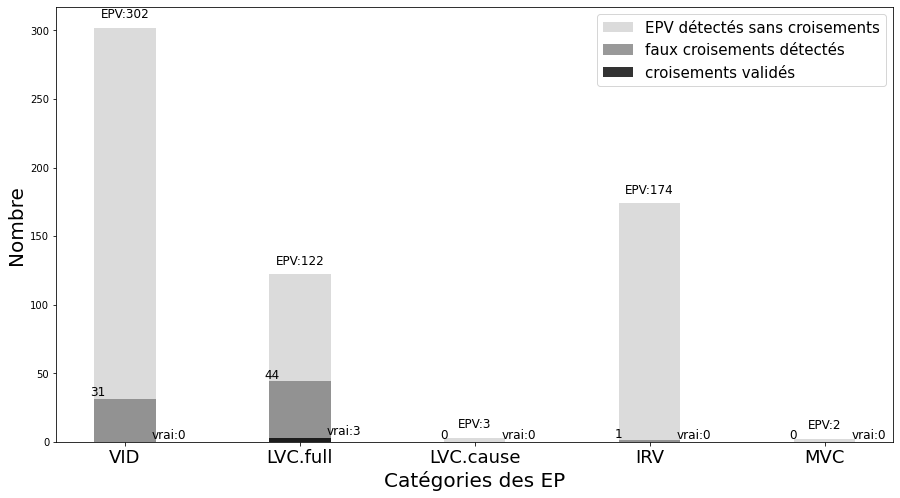

ancor


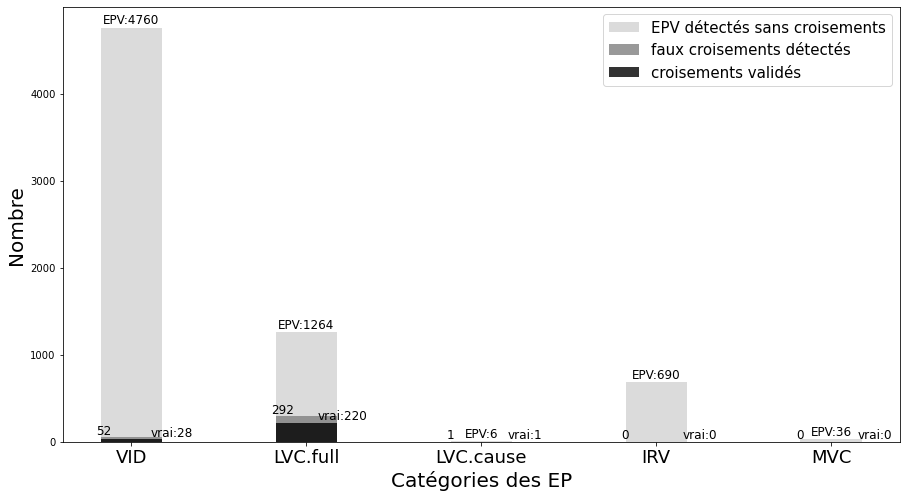

In [26]:
# new (croisements détectés sans exemples avec erreur de MWE)
for i,corpus in enumerate(corpus_inorder):
    print(corpus)
    draw_stackedbar_EPVcrois_cat(cat_MWE, mwe_nbre[i], crois_nbre[i], vrai_nbre[i])

total


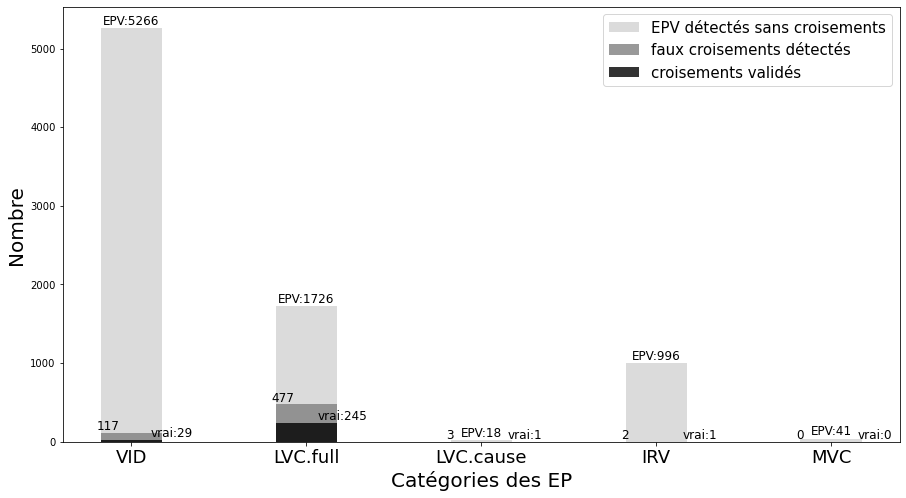

In [27]:
# new
print("total")
draw_stackedbar_EPVcrois_cat(cat_MWE, np.sum(mwe_nbre,axis=0), np.sum(crois_nbre,axis=0), np.sum(vrai_nbre,axis=0))

## Ratio de croisements vrais / EPV vérifiées

In [38]:
# use all
vrai_nbre/crois_nbre

<ipython-input-38-a43cd99ead8a>:2: RuntimeWarning: invalid value encountered in true_divide
  vrai_nbre/crois_nbre


array([[0.02941176, 0.15602837, 0.        , 1.        ,        nan],
       [0.        , 0.06818182,        nan, 0.        ,        nan],
       [0.54716981, 0.75      , 1.        ,        nan,        nan]])

In [39]:
# use only sequoia
vrai_nbre/mwe_nbre

array([[0.00490196, 0.06470588, 0.        , 0.00757576, 0.        ],
       [0.        , 0.02459016, 0.        , 0.        , 0.        ],
       [0.00609244, 0.17325949, 0.16666667, 0.        , 0.        ]])

In [40]:
# influencé par les bruits
np.sum(vrai_nbre, axis=0)/np.sum(crois_nbre, axis=0)

<ipython-input-40-a77f4b032fd5>:2: RuntimeWarning: invalid value encountered in true_divide
  np.sum(vrai_nbre, axis=0)/np.sum(crois_nbre, axis=0)


array([0.25423729, 0.5115304 , 0.33333333, 0.5       ,        nan])

In [41]:
# influencé par les bruits
a = np.sum(vrai_nbre, axis=0)/np.sum(mwe_nbre, axis=0)
a[:3]

array([0.00569692, 0.14136732, 0.05555556])

In [37]:
# 4 barres: VID, LVC.full et LVC.cause, total de 3 cat
# 5 groupes : vrai/epv vérifie * 2 (sans Sequoia), vrai/epv (sequoia), vrai/epv vérifie (global), vrai/epv (global, biaisé possible)

# results matrix
labels = ["vrais croisements/EPV vérifiés(ancor)", "vrais croisements/EPV vérifiés(er)", "vrais croisements/EPV vérifiés(sequoia)",
          "vrais croisements/EPV annotés(sequoia)", "vrais croisements/EPV vérifiés(corpus total)","vrais croisements/EPV détectés(corpus total)"]
bar_labels = ["VID","LVC.full","LVC.cause", "Total(3 catégories)"]

res_matrix = np.zeros(shape=(6,3))
# global of cat
global_cat = np.zeros(shape=(6,1))

# subcorpus
res_matrix[0] = vrai_nbre[2,:3] / crois_nbre[2,:3]  # vrai_val_ancor
global_cat[0] = np.sum(vrai_nbre[2,:3])/np.sum(crois_nbre[2,:3]) #不区分cat

res_matrix[1] = vrai_nbre[1,:3] / crois_nbre[1,:3]
global_cat[1] = np.sum(vrai_nbre[1,:3])/np.sum(crois_nbre[1,:3])

res_matrix[2] = vrai_nbre[0,:3] / crois_nbre[0,:3]
global_cat[2] = np.sum(vrai_nbre[0,:3])/np.sum(crois_nbre[0,:3])

res_matrix[3] = vrai_nbre[0,:3] / mwe_nbre[0,:3]
global_cat[3] = np.sum(vrai_nbre[0,:3])/np.sum(mwe_nbre[0,:3])

# global
res_matrix[4] = np.sum(vrai_nbre[:,:3], axis=0)/np.sum(crois_nbre[:,:3], axis=0)
global_cat[4] = np.sum(vrai_nbre[:,:3])/np.sum(crois_nbre[:,:3])

res_matrix[5] = np.sum(vrai_nbre[:,:3], axis=0)/np.sum(mwe_nbre[:,:3], axis=0)
global_cat[5] = np.sum(vrai_nbre[:,:3])/np.sum(mwe_nbre[:,:3])

# add global cat to the result metrix
res_matrix = np.column_stack((res_matrix, global_cat))

res_matrix[np.isnan(res_matrix)] = 0  # 用0填充nan值，nan来源于/0

#transpose, to have cat as bar and each ratio as group
res_matrix = res_matrix.T
print(res_matrix)

[[0.53846154 0.         0.02941176 0.00490196 0.24786325 0.00550703]
 [0.75342466 0.06818182 0.15602837 0.06470588 0.51362683 0.1419467 ]
 [1.         0.         0.         0.         0.33333333 0.05555556]
 [0.72173913 0.04       0.1299435  0.04159132 0.46063652 0.03922967]]


<ipython-input-37-b7385f78fdbe>:17: RuntimeWarning: invalid value encountered in true_divide
  res_matrix[1] = vrai_nbre[1,:3] / crois_nbre[1,:3]


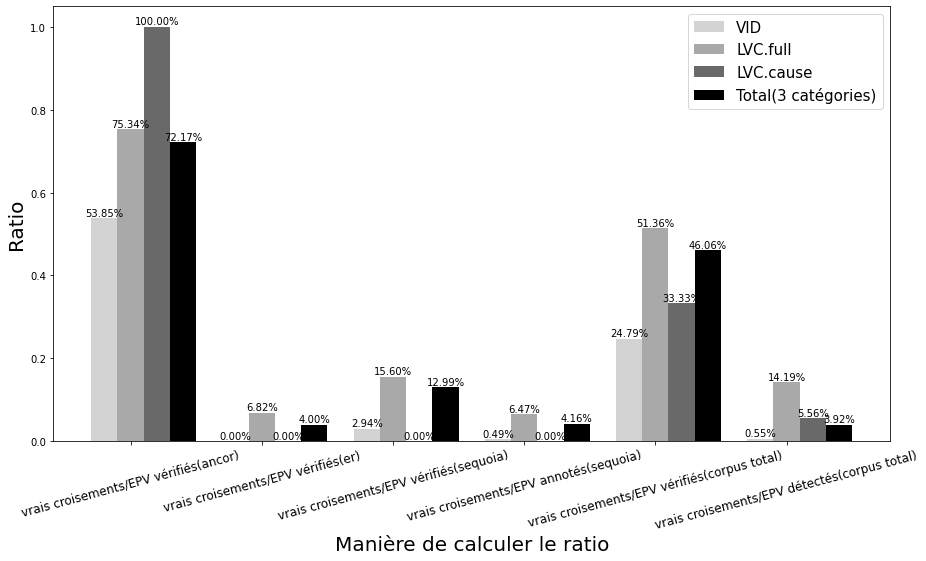

In [38]:
# draw plot

plt.figure(figsize=(15,8))
col_num = 6
x = np.arange(col_num)

total_width,n = 0.8, 4
width = total_width/n
# x = x - total_width/2  #不知道为什么，但是不会居中，在第二个bar结束的地方
x = x - (total_width - width) / 2

# VID
plt.bar(x,res_matrix[0,:], width=width, label=bar_labels[0], color="lightgrey")
for a,b in zip(x,res_matrix[0,:]):  #(a,b)  条形顶部中间在图中的位置 对应(x,y)
    plt.text(a, b+0.001, "%.2f%%"%(b*100), ha='center', va='bottom', fontsize=10)

#LVC.full
plt.bar(x + width,res_matrix[1,:], width=width, label=bar_labels[1], color="darkgrey")
for a,b in zip(x + width,res_matrix[1,:]):  #(a,b)  条形顶部中间在图中的位置 对应(x,y)
    plt.text(a, b+0.001, "%.2f%%"%(b*100), ha='center', va='bottom', fontsize=10)
    
#LVC.cause
plt.bar(x + width*2,res_matrix[2,:], width=width, label=bar_labels[2], color="dimgrey")
for a,b in zip(x + width*2,res_matrix[2,:]):  #(a,b)  条形顶部中间在图中的位置 对应(x,y)
    plt.text(a, b+0.001, "%.2f%%"%(b*100), ha='center', va='bottom', fontsize=10)

#total
plt.bar(x + width*3,res_matrix[3,:], width=width, label=bar_labels[3], color="black")
for a,b in zip(x + width*3,res_matrix[3,:]):  #(a,b)  条形顶部中间在图中的位置 对应(x,y)
    plt.text(a, b+0.001, "%.2f%%"%(b*100), ha='center', va='bottom', fontsize=10)


plt.legend(fontsize=15)  #加图例
plt.xticks(x + width,labels,size="small", rotation=15, fontsize=12)
plt.xlabel("Manière de calculer le ratio", fontsize=20)
plt.ylabel("Ratio", fontsize=20)

plt.show()

## Calcul des précisions

In [219]:
df_er_test = pd.DataFrame(df_er, columns = ["TYPE","error_mwe"])
df_er_test
# df_er.groupby('TYPE')[]

,TYPE,error_mwe
0,LVC.cause,True
1,IRV,False
2,LVC.full,False
3,LVC.full,False
4,LVC.full,False
...,...,...
91,VID,False
92,VID,False
93,VID,True
94,VID,True


In [234]:
df_er_test.groupby("TYPE").describe()
# col error_mwe : True MWE有错  False MWE没错

error_mwe                   
              count unique    top freq
TYPE                                  
IRV               1      1  False    1
LVC.cause         1      1   True    1
LVC.full         45      2  False   44
VID              49      2  False   31

In [239]:
a = df_er_test.groupby("TYPE")['error_mwe'].value_counts()
a

TYPE       error_mwe
IRV        False         1
LVC.cause  True          1
LVC.full   False        44
           True          1
VID        False        31
           True         18
Name: error_mwe, dtype: int64

In [28]:
MWE_cat = ["VID","LVC.full","LVC.cause","IRV"]
corpus_precision = ["er","ancor"]

df_er_test = pd.DataFrame(df_er, columns = ["TYPE","error_mwe"])
df_ancor_test = pd.DataFrame(df_ancor, columns = ["TYPE","error_mwe"])

er = df_er_test.groupby("TYPE")['error_mwe'].value_counts()
ancor = df_ancor_test.groupby("TYPE")['error_mwe'].value_counts()
corpus_p = [er, ancor]

vp = np.zeros(shape=(2,4))
fp = np.zeros(shape=(2,4))

for i,corpus in enumerate(corpus_p):
    for j,cat in enumerate(MWE_cat):
        try:
            vp[i,j] = corpus[cat,False]
        except KeyError:
            vp[i,j] = 0
        try:
            fp[i,j] = corpus[cat,True]
        except KeyError:
            fp[i,j] = 0
            
vp = np.column_stack((vp,np.sum(vp,axis=1)))
vp = np.row_stack((vp,np.sum(vp,axis=0)))
fp = np.column_stack((fp,np.sum(fp,axis=1)))
fp = np.row_stack((fp,np.sum(fp,axis=0)))
print("## vrai positif ##")
print(vp)
print("## faux positif ##")
print(fp)

## vrai positif ##
[[ 31.  44.   0.   1.  76.]
 [ 52. 292.   1.   0. 345.]
 [ 83. 336.   1.   1. 421.]]
## faux positif ##
[[ 18.   1.   1.   0.  20.]
 [526. 164.   0.   2. 692.]
 [544. 165.   1.   2. 712.]]


In [29]:
matrix_precision = vp / (vp + fp)
matrix_precision

array([[0.63265306, 0.97777778, 0.        , 1.        , 0.79166667],
       [0.0899654 , 0.64035088, 1.        , 0.        , 0.33269045],
       [0.1323764 , 0.67065868, 0.5       , 0.33333333, 0.37157988]])

## Les 4 cas

In [30]:
# fonction sert à obtenir les cas
def get_cat(string):
    dico_cas = eval(string)
    cas = []
    for i in dico_cas.values():
        cas.append(i)
    if len(cas)==1:
        return cas[0]
    else:
        if 1 in cas:
            return 1
        elif 2 in cas:
            return 2
        elif 4 in cas:
            return 4
        else:
            return cas[-1]
# test
get_cat("{'2434': 4}")

4

In [50]:
df_results = df_ancor.append(df_er)
df_results = df_results.append(df_sequoia)
df_results = df_results[df_results.error_mwe==False] # ici, les croisements avec fautes de MWE sont éliminés du calcul
df_results["CAS"] = df_results["CAS"].map(get_cat)


figure_name = "Croisements détectés par cas et type"
print("Nombre des croisements détectés (sans erreurs MWE) :", len(df_results))

## choix de cas vrai (à décommenter pour le graphe de croisements vrais)
# df_results = df_results[df_results.VALIDATION == "vrai"]
# figure_name = "Croisements vrais par cas et type"
# print("Nombre des croisements vrais (sans erreurs MWE) :", len(df_results))

cas_count = df_results.groupby("TYPE")["CAS"].value_counts()
df_results.head(3)

Nombre des croisements détectés (sans erreurs MWE) : 599


,FICHIER,PHRASE,TOKENS,COREF,CAS,CHAINE(S),VALIDATION,DEGRE DE COMPOSITIONNALITE,SOURCE D'ERREUR,LEMMES,TYPE,CORPUS,error_mwe,real_type
0,023_C_mwe_coref.cupt,bah parce que celui qui reçoit une lettre qui ...,"['donne', 'impression']","['*', '273:2434']",4,"{'273': '{'2434': ['mauvaise', 'impression'], ...",vrai,moyen,[],"[donner, impression]",LVC.cause,ancor_ESLO_ANCOR,False,LVC.cause
6,013_C-1_mwe_coref.cupt,j' avais pensé partir il y a quelques années j...,"['pris', 'suite']","['*', '15:20']",4,"{'15': '{'20': ['la', 'suite', 'de', 'mes', 'p...",répétitions,,[],"[prendre, suite]",VID,ancor_ESLO_ANCOR,False,VID
7,013_C-1_mwe_coref.cupt,c' est un peu ça qui m' a fait prendre la suite,"['prendre', 'suite']","['*', '15:100']",4,"{'15': '{'20': ['la', 'suite', 'de', 'mes', 'p...",répétitions,,[],"[prendre, suite]",VID,ancor_ESLO_ANCOR,False,VID


In [51]:
# grouper par type et cas 
cas_count

TYPE       CAS
IRV        3        2
LVC.cause  4        3
LVC.full   4      421
           3       34
           1       22
VID        3       77
           4       38
           1        2
Name: CAS, dtype: int64

In [52]:
MWE_cat = ['VID', 'LVC.full', 'LVC.cause', 'IRV', "total"]

cas_list = [1,2,3,4]
nbre_cas = np.zeros(shape=(4,4))
for i,cat in enumerate(MWE_cat):
    for j,cas in enumerate(cas_list):
        try:
            nbre_cas[i,j] = cas_count[cat,cas]
        except KeyError:
            continue
nbre_cas = np.row_stack((nbre_cas, np.sum(nbre_cas,axis=0)))

In [53]:
nbre_cas   #row : cat     col: cas

array([[  2.,   0.,  77.,  38.],
       [ 22.,   0.,  34., 421.],
       [  0.,   0.,   0.,   3.],
       [  0.,   0.,   2.,   0.],
       [ 24.,   0., 113., 462.]])

In [54]:
nbre_cas = nbre_cas.T
nbre_cas  #row : cas    col: cat

array([[  2.,  22.,   0.,   0.,  24.],
       [  0.,   0.,   0.,   0.,   0.],
       [ 77.,  34.,   0.,   2., 113.],
       [ 38., 421.,   3.,   0., 462.]])

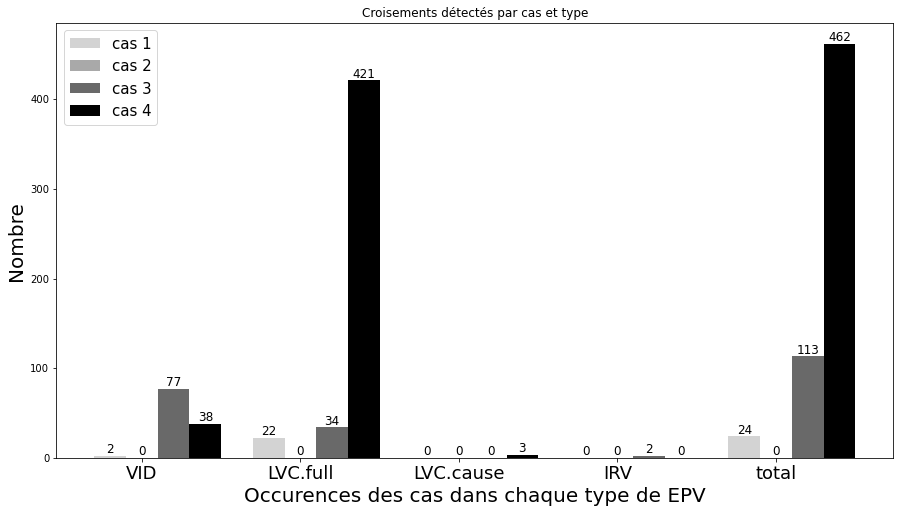

In [55]:
# draw plot
plt.figure(figsize=(15,8))
col_num = 5
x = np.arange(col_num)

total_width,n = 0.8, 4
width = total_width/n
x = x - (total_width - width) / 2

# cas 1
plt.bar(x,nbre_cas[0,:], width=width, label=f"cas {cas_list[0]}", color="lightgrey")
for a,b in zip(x,nbre_cas[0,:]):  #(a,b)  条形顶部中间在图中的位置 对应(x,y)
    plt.text(a, b+0.001, "%.0f"%b, ha='center', va='bottom', fontsize=12)

# cas 2
plt.bar(x + width,nbre_cas[1,:], width=width, label=f"cas {cas_list[1]}", color="darkgrey")
for a,b in zip(x + width,nbre_cas[1,:]):  #(a,b)  条形顶部中间在图中的位置 对应(x,y)
    plt.text(a, b+0.001, "%.0f"%b, ha='center', va='bottom', fontsize=12)
    
# cas 3
plt.bar(x + width*2,nbre_cas[2,:], width=width, label=f"cas {cas_list[2]}", color="dimgrey")
for a,b in zip(x + width*2,nbre_cas[2,:]):  #(a,b)  条形顶部中间在图中的位置 对应(x,y)
    plt.text(a, b+0.001, "%.0f"%b, ha='center', va='bottom', fontsize=12)

# cas 4
plt.bar(x + width*3,nbre_cas[3,:], width=width, label=f"cas {cas_list[3]}", color="black")
for a,b in zip(x + width*3,nbre_cas[3,:]):  #(a,b)  条形顶部中间在图中的位置 对应(x,y)
    plt.text(a, b+0.001, "%.0f"%b, ha='center', va='bottom', fontsize=12)

plt.legend(fontsize=15)  #加图例
plt.xticks(x + width,MWE_cat,size="small", fontsize=18)
plt.xlabel("Occurences des cas dans chaque type de EPV", fontsize=20)
plt.ylabel("Nombre", fontsize=20)
plt.title(figure_name)

plt.show()

### cas validation

In [40]:
df_results = df_ancor
df_results = df_results.append(df_er)
df_results = df_results.append(df_sequoia)
df_results = df_results[df_results.error_mwe==False]
df_results["CAS"] = df_results["CAS"].map(get_cat)
# grouper par cas et validation
cas_count = df_results.groupby("CAS")["VALIDATION"].value_counts()
cas_count

CAS  VALIDATION  
1    faux             12
     non concerné      9
     vrai              3
3    faux             46
     vrai             43
     répétitions      23
     discutable        1
4    vrai            218
     faux            165
     répétitions      76
     discutable        3
Name: VALIDATION, dtype: int64

In [41]:
from matplotlib import cm
from matplotlib import font_manager as fm

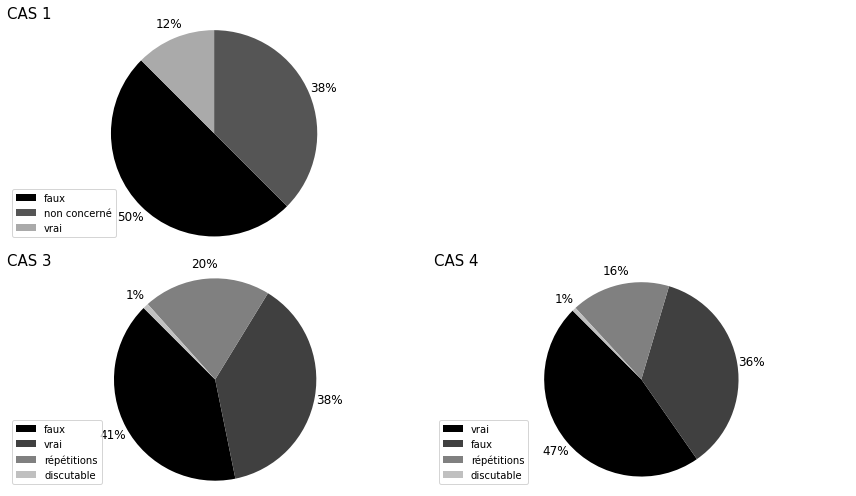

In [42]:
cas = [1,3,4]
plt.figure(figsize=(12,7))

for i in cas:
    labels = cas_count[i].index
    sizes = cas_count[i].values    
    plt.subplot(2,2,i)
    colors = cm.gray(np.arange(len(sizes))/len(sizes))

    patches, texts, autotexts = plt.pie(sizes, autopct='%1.0f%%',
                                    shadow=False, startangle=135, colors=colors,
                                   labeldistance=1.15, pctdistance=1.15)
    plt.axis('equal')

    # font size
    proptease = fm.FontProperties(size="large")
    plt.setp(autotexts, fontproperties=proptease)  # autotexts = le pourcentage
    plt.setp(texts, fontproperties=proptease)  #label

    plt.legend(patches, labels, loc=3)
    plt.title(f"CAS {i}", loc="left", fontdict={'size':15})
    plt.tight_layout()
plt.show()